# Introduction

How many components?
1. Data extraction & cleaning: web scraping
4. Entity recognition: json output of Koko results
5. Data transformation: from json to dataframe

Flow of each component:
1. Introduction
2. Example
3. Graded task

Suppose you are data scientist invited by the aviation field to analyze all the history aviation incidents.  
The results could help the aviation field to reveal potential problems, build more robust aircraft, and impose more effective regulation.


# 1. Data acquisition & cleaning

Task: extract texts of aviation incidents from websites  
Tools: BeautifulSoup, scrapy  
Grading metrics: autograder finds a given set of sentences in the txt file uploaded.

We first use BeautifulSoup to extract text information from the aircraft incident website.  
BeautifulSoup has been pre-installed for you.

Here we use lxml parser.  
You can definitely try other parsers, as illustrated [here](https://www.crummy.com/software/BeautifulSoup/bs4/doc/).

In [1]:
from bs4 import BeautifulSoup

input_html = "./data/aircraft_incidents.htm"
with open(input_html, "r") as ifile:
    soup = BeautifulSoup(ifile, 'lxml')
    
soup.title.string

'List of accidents and incidents involving commercial aircraft - Wikipedia'

**Task 1:** Use BeautifulSoup to scrape the website on \[server url\], and generate a text file containing all the text on the website. The generated file should not contain any tag information of the scraped html file.

In [2]:
# Write your code here #

fname = "./data/aviation_incidents_raw_texts.txt"

The following code will check if the generated text file satisfy the requirement.
(We should have a more strict checking after the assignment is submitted.)

In [3]:
import re

with open(fname, "r") as ifile:
    # Check if all tags have been removed
    doc = ifile.read()
    result = re.search(r"<.*>", doc)
    if result:
        print("Error: \n{}".format(result.string))
    else:
        print("No tag found!")

No tag found!


After the web page is scraped, you may find that the extracted data is not very organized.  
So the next step is to clean the extracted data, so that it can be used for further analysis.

Here's a sample of how a cleaned version should look like:

In [4]:
with open('./data/aviation_incidents_cleaned.txt') as ifile:
    for i in range(5):
        print(ifile.readline())

July 21, 1919, The Goodyear dirigible Wingfoot Air Express catches fire and crashes into the Illinois Trust and Savings Building in Chicago, Illinois, while carrying passengers to a local amusement park, killing thirteen people: three out of the five on board and ten others on the ground, with 27 others on the ground being injured.

August 2, 1919, A Caproni Ca.48 crashes at Verona, Italy, during a flight from Venice to Taliedo, Milan, killing all on board (14, 15, or 17 people, according to different sources).

December 14, 1920, A Handley Page Transport Handley Page O/400 hits a tree and crashes at Golders Green, London, after failing to gain height following takeoff, killing four out of eight on board.

April 7, 1922, In the first mid-air collision of airliners, a de Havilland DH.18A, G-EAWO, operated by Daimler Hire Ltd., collides with a Farman F.60 Goliath, F-GEAD, operated by Compagnie des Grands Express Aériens (CGEA), over the Thieulloy-St. Antoine road near Picardie, France, k

There are a variety of ways to clean the documents. Here we give one example.  

* Extract the part that specifies the incidents.
* Clean the extract part.

First, we extract the texts that list all the incidents.

In [5]:
with open('./data/aviation_incidents_raw_texts.txt') as ifile:
    with open('./data/aviation_incidents_select.txt', 'w+') as ofile:
        to_record = False
        for line in ifile:
            cleaned_line = line.rstrip()
            if not cleaned_line:
                continue
            
            if 'References' in line:
                break
                
            if 'See also' in line:
                to_record = True
                continue
        
            if to_record == True:
                ofile.write(line)        

Let's take a glimpse of the output file.

In [6]:
with open('./data/aviation_incidents_select.txt') as myfile:
    head = [next(myfile) for x in range(10)]
head

['1910s and 1920s[edit]\n',
 '1919[edit]\n',
 'July 21 – The Goodyear dirigible Wingfoot Air Express catches fire and crashes into the Illinois Trust and Savings Building in Chicago, Illinois, while carrying passengers to a local amusement park, killing thirteen people: three out of the five on board and ten others on the ground, with 27 others on the ground being injured.\n',
 'August 2 – A Caproni Ca.48 crashes at Verona, Italy, during a flight from Venice to Taliedo, Milan, killing all on board (14, 15, or 17 people, according to different sources).\n',
 '1920[edit]\n',
 'December 14 – A Handley Page Transport Handley Page O/400 hits a tree and crashes at Golders Green, London, after failing to gain height following takeoff, killing four out of eight on board.\n',
 '1922[edit]\n',
 'April 7 – In the first mid-air collision of airliners, a de Havilland DH.18A, G-EAWO, operated by Daimler Hire Ltd., collides with a Farman F.60 Goliath, F-GEAD, operated by Compagnie des Grands Express 

Next, we move the year information into each entry.  

For example, if we have:  
"1920\[edit\]:  
December 14 – A Handley Page Transport Handley Page O/400 hits a tree and crashes at Golders Green, London, after failing to gain height following takeoff, killing four out of eight on board."  

We will remove "1920\[edit\]:", and add "1920" into the line of the event, so that we'll have:
"On December 14, 1920 – A Handley Page Transport Handley Page O/400 hits a tree and crashes at Golders Green, London, after failing to gain height following takeoff, killing four out of eight on board."  

In [7]:
def represent_int(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

with open('./data/aviation_incidents_select.txt' ) as ifile:
     with open('./data/aviation_incidents_cleaned.txt', 'w') as ofile:
        year = 0
        for line in ifile:
            cleaned_line = line.replace('[edit]', '')
            proc_line = cleaned_line.rstrip()
            if represent_int(proc_line):
                # The line represents a year
                year = int(proc_line)
                continue
            else:
                months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
                          'August', 'September', 'October', 'November', 'December']
                month_pattern = '|'.join(months)
                if re.search(month_pattern, proc_line):
                    match_obj = re.search(r"[0-9]\s.\s", proc_line)
                    if match_obj:
                        replace_text = ", " + str(year) + ", "
                        newline = proc_line.replace(match_obj.group()[1:], replace_text)
                        ofile.write(newline+'\n')

Let's take a look.

In [8]:
with open('./data/aviation_incidents_cleaned.txt') as myfile:
    head = [next(myfile) for x in range(5)]
head

['July 21, 1919, The Goodyear dirigible Wingfoot Air Express catches fire and crashes into the Illinois Trust and Savings Building in Chicago, Illinois, while carrying passengers to a local amusement park, killing thirteen people: three out of the five on board and ten others on the ground, with 27 others on the ground being injured.\n',
 'August 2, 1919, A Caproni Ca.48 crashes at Verona, Italy, during a flight from Venice to Taliedo, Milan, killing all on board (14, 15, or 17 people, according to different sources).\n',
 'December 14, 1920, A Handley Page Transport Handley Page O/400 hits a tree and crashes at Golders Green, London, after failing to gain height following takeoff, killing four out of eight on board.\n',
 'April 7, 1922, In the first mid-air collision of airliners, a de Havilland DH.18A, G-EAWO, operated by Daimler Hire Ltd., collides with a Farman F.60 Goliath, F-GEAD, operated by Compagnie des Grands Express Aériens (CGEA), over the Thieulloy-St. Antoine road near Pi

# 3. Entity recognition

## Word Cloud

Let's first do a quick word cloud to get some sense of the popular words in the corpus.

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

with open('./data/aviation_incidents_cleaned.txt') as myfile:
    doc = myfile.read()
text = doc.lower()
wordcloud = WordCloud(background_color="white", font_path='../../../Library/Fonts/Arial.ttf', \
                          height=2700, width=3600).generate(text)
plt.figure( figsize=(14,8) )
plt.imshow(wordcloud.recolor(colormap=plt.get_cmap('Set2')), interpolation='bilinear')
plt.axis("off")

(-0.5, 3599.5, 2699.5, -0.5)

It would be more informative if we remove some words that're common to aviation field, such as airlines or flight.

(-0.5, 3599.5, 2699.5, -0.5)

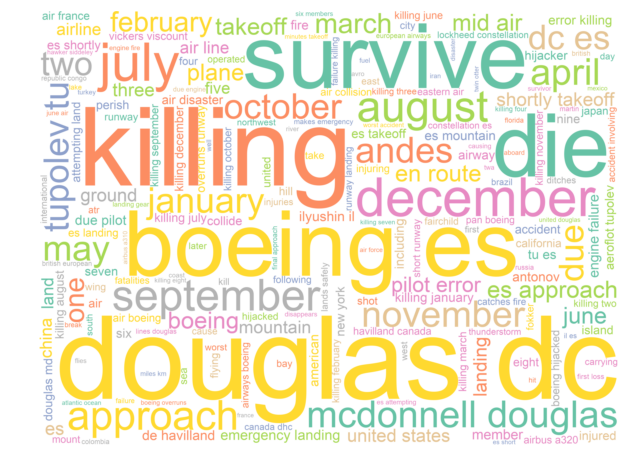

In [10]:
LIMIT_WORDS = ['airlines flight', 'flight', 'people', 'board', 'international airport', 
               'passenger', 'crew', 'airport', 'aircraft', 'near', 'crash', 'killed']

text = doc.lower()
for w in LIMIT_WORDS:
    text = text.replace(' ' + w, '')
    text = text.replace(w + ' ', '')
wordcloud = WordCloud(background_color="white", font_path='../../../Library/Fonts/Arial.ttf', \
                          height=2700, width=3600).generate(text)
plt.figure( figsize=(14,8) )
plt.imshow(wordcloud.recolor(colormap=plt.get_cmap('Set2')), interpolation='bilinear')
plt.axis("off")

It seems that the aircraft of douglas dc appears quite often. 

## Introduction: Named Entity Extration

We can try extracting airline company names from the corpus, to see which company has the most number of incidents.  
There are a number tools that can extract entities from text, including NLTK, spaCy, Google NLP.  
Today we will introduce an entity extraction framework called Koko, which allows the user to specify properties of the extracted entities in a declarative way.

In [11]:
with open('./koko_queries/airlines_v2.koko', 'r') as file:
    print(file.read())

extract "Ents" x from "/Users/chen/Research/Code/BigGorilla-assignments/Koko/data/aviation_incidents_cleaned.txt" if
	(str(x) contains "Airlines" {0.1}) or
	(str(x) contains "Air" {0.1})
with threshold 0.0



This query tells Koko to extract noun phrases 'x' from HappyDB if "x" is preceded by either "buy" or "purchase".

The weight in each "if" condition (e.g., {0.1} for ("buy" x)) represents the importance of the pattern specified in the condition.
Any appearance of an entity in happy moments that matches the pattern is considered a piece of evidence.
And each such piece of evidence would increment the entity's score by the condition's weight.

For example, if there's a happy moment "I buy a car", this moment is considered as evidence for "a car" based on the first condition, and 0.1 is added to "a car"'s score.
In Koko, the score of an entity is at most 1.

Finally, we can specify threshold in Koko queries.
Only entities scoring higher than the thresold would be returned in the results.
For simplicity, I put zero as thresold here, which shows all entities that have at least one piece of evidence in happy moments.

If you are interested, check out more tutorials for Koko [here](http://pykoko.readthedocs.io/en/latest/).

Let's run the Koko query now to see the results.

Here I use spaCy as the nlp processor for happy moments. Koko could leverage spaCy's APIs for entity extraction.
The extracted entities could be further matched against the conditions in the Koko query to get scored, ranked and filtered.

SpaCy is not the only option. We can also use Koko's default parser or Google NLP API as well.

In [12]:
import koko
import spacy

koko.run('./koko_queries/airlines_v2.koko', doc_parser='spacy')

Parsed query: extract "/Users/chen/Research/Code/BigGorilla-assignments/Koko/data/aviation_incidents_cleaned.txt" Ents from "x" if
	(str(x) contains "Airlines" { 0.10 }) or
	(str(x) contains "Air" { 0.10 })   
with threshold 0.00


Results:

Entity name                    Entity count         Entity score
United Airlines                27                   1.000000
American Airlines              25                   1.000000
Northwest Airlines             11                   1.000000
Eastern Air Lines              16                   1.000000
Air France                     15                   1.000000
Japan Airlines                 11                   1.000000
China Airlines                 11                   1.000000
National Airlines              7                    0.700000
Northwest Orient Airlines      7                    0.700000
Philippine Airlines            7                    0.700000
Indian Airlines                7                    0.700000
Merpati Nusantara Airl

If we only want to see the top few results, we can set up threshold.

In [13]:
koko.run('./koko_queries/airlines_v3.koko', doc_parser='spacy')

Parsed query: extract "/Users/chen/Research/Code/BigGorilla-assignments/Koko/data/aviation_incidents_cleaned.txt" Ents from "x" if
	(str(x) contains "Airlines" { 0.10 }) or
	(str(x) contains "Air" { 0.10 })   
with threshold 0.40


Results:

Entity name                    Entity count         Entity score
United Airlines                27                   1.000000
American Airlines              25                   1.000000
Northwest Airlines             11                   1.000000
Eastern Air Lines              16                   1.000000
Air France                     15                   1.000000
Japan Airlines                 11                   1.000000
China Airlines                 11                   1.000000
National Airlines              7                    0.700000
Northwest Orient Airlines      7                    0.700000
Philippine Airlines            7                    0.700000
Indian Airlines                7                    0.700000
Merpati Nusantara Airl

We can also see the original texts.import koko
import spacy

koko.run('./koko_queries/airlines_v2.koko', doc_parser='spacy')

In [14]:
koko.run('./koko_queries/airlines_v4.koko', doc_parser='spacy', verbose_info=True)

Parsed query: extract "/Users/chen/Research/Code/BigGorilla-assignments/Koko/data/aviation_incidents_cleaned.txt" Ents from "x" if
	(str(x) contains "Airlines" { 0.01 }) or
	(str(x) contains "Air" { 0.01 })   
with threshold 0.26


Results:

Entity name                    Entity count         Entity score
United Airlines                27                   0.270000
	 October 7, 1935, United Airlines Trip 4, a Boeing 247D, crashes near Silver Crown, Wyoming, United States, due to pilot error; all 12 on board die.
 

	 December 27, 1936, United Airlines Trip 34, a Boeing 247, crashes at Rice Canyon (near Newhall, California, United States) due to pilot error, killing all 12 on board.
 

	 May 29, 1947, United Airlines Flight 521, a Douglas DC-4, crashes on takeoff from LaGuardia Airport, New York, United States, due to pilot error; 42 of 48 on board die.
 

	 October 24, 1947, United Airlines Flight 608, a Douglas DC-6, crashes near Bryce Canyon Airport, Utah, United States, when fire ca

**Task 2:** Find the models of aircrafts that have most incidents in the corpus.

# 3. Data transformation

Text data are not structured. To facilitate further data processing, it would be better if we convert text into more structured data, such as Dataframes.  

Here we use textual data instead of JSON output of Koko, because Koko's response doesn't include the original texts, but only the sentence ID of the matching sentences.

# From text to Dataframe

We use spaCy and pandas to convert text data into Dataframe.

We need the list of all aircrafts to sift through the extraction results.  

https://en.wikipedia.org/wiki/List_of_aircraft_by_date_and_usage_category

In [1]:
from bs4 import BeautifulSoup

input_html = "./data/aircrafts.htm"
with open(input_html, "r") as ifile:
    soup = BeautifulSoup(ifile, 'lxml')
    with open('aircrafts_raw.txt', "w") as ofile:
        ofile.write(soup.get_text())

In [8]:
import pandas as pd
import spacy

nlp = spacy.load('en')

df = pd.DataFrame(columns=['Date', 'Airline', 'Aircraft', 'Location'])
# We could add the field of 'Aircraft'. But that could be tricky.

incidents = []
with open('./data/aviation_incidents_cleaned.txt') as myfile:
    for line in myfile:
        doc = nlp(line)
        icd = {'Date':'', 'Airline':'', 'Aircraft':'', 'Location':''}
        for ent in doc.ents:
            if ent.label_ == u'DATE':
                # Get the date
                icd['Date'] = ent.text
            elif ent.label_ == u'ORG':
                # Get the organization
                icd['Airline'] = ent.text                
            elif ent.label_ == u'PRODUCT' and 'Flight' in ent.text:
                # Get the flight number
                icd['Flight'] = ent.text
            elif ent.label_ == u'GPE':
                # Get the location
                icd['Location'] += ent.text
        incidents.append(icd)

df = pd.DataFrame(incidents)
df.head

<bound method NDFrame.head of      Aircraft                                  Airline                Date  \
0              the Illinois Trust and Savings Building      July 21, 1919,   
1                                        Caproni Ca.48     August 2, 1919,   
2                                        Golders Green   December 14, 1920   
3                                            Thieulloy      April 7, 1922,   
4                                         An Air Union        May 14, 1923   
5                                        Kent, England     August 27, 1923   
6                            Ivinghoe, Buckinghamshire  September 14, 1923   
7                     An Imperial Airways de Havilland  December 24, 1924,   
8                                         College Farm         a day later   
9                                 An Air Union Blériot     October 2, 1926   
10                                       Kent, England     August 22, 1927   
11                                

In [9]:
df.head(5)

,Aircraft,Airline,Date,Flight,Location
0,,the Illinois Trust and Savings Building,"July 21, 1919,",NaN,ChicagoIllinois\n
1,,Caproni Ca.48,"August 2, 1919,",NaN,VeronaItalyVeniceTaliedoMilan\n
2,,Golders Green,"December 14, 1920",NaN,London\n
3,,Thieulloy,"April 7, 1922,",NaN,France\n
4,,An Air Union,"May 14, 1923",NaN,MonsuresSommeFrance\n


## Convert the JSON output into Dataframes

We convert the JSON output into Dataframes by using [pandas](https://pandas.pydata.org/).

<bound method NDFrame.head of                                             document  \
0  July 21, 1919, The Goodyear dirigible Wingfoot...   

                                            entities  \
0  {'mentions': [{'debug': '', 'score': 0.01, 'sc...   

                                               query  
0  extract "Ents" x from "/Users/chen/Research/Co...  >

# Post-process the output

For example, merge different "Air France"

Task: transform Koko's json output to dataframe  
Tools: Python (read_json)  
Grading metrics: autograder would load the dataframe and do some checking, e.g., shape.  
Comments: is this part too simple?